### FASE 2 - EVALUACIÓN FINAL - MÓDULO 3 - IRINA OSTOJIC

#### _IMPORTS_

In [25]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [26]:
# Lectura de fichero
df = pd.read_csv("datasky_clean.csv")

## FASE 2: VISUALIZACIÓN

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:  

In [27]:
# GUÍA DE COLORES QUE UTILIZAREMOS DURANTE ESTA FASE DEL EJERCICIO
colores_pop = [
    "lightcoral",      # rojo suave
    "lightskyblue",    # azul cielo
    "plum",            # morado pastel
    "peachpuff",       # melocotón
    "mediumaquamarine", # verde agua
    "palegreen",       # verde menta
    "khaki",           # amarillo suave
    "salmon",          # rosado cálido
    "thistle",         # lavanda
    "powderblue",      # azul polvo
    "lightpink"        # rosa claro
    ]

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [28]:
# Me imprimo 3 ejemplos aleatorios para recordar el nombre de las columnas y el tipo de información que contenían
df.sample(3)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
161701,461559,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,102440.000000,Married,Star,8802.19,Standard,2016,9,2017,10,3,0,3,600,60.0,0.0,0.0
266976,694021,Canada,Ontario,Toronto,P2T 6G3,Male,College,79371.732902,Married,Aurora,6847.59,2018 Promotion,2018,3,2018,6,7,6,13,1183,118.0,0.0,0.0
19961,144523,Canada,Quebec,Tremblant,H5Y 2S9,Male,High School or Below,76905.000000,Married,Nova,9269.68,Standard,2013,8,2018,5,7,0,7,2555,255.0,0.0,0.0


Agrupo por Año ("year") y Mes ("month"), y sumo los Vuelos Reservados ("flights_booked")

In [29]:
"""
Como tenemos varios años, he decidido agrupar tanto por mes como por año.
He sumado los vuelos dentro de cada agrupación.
He puesto reset_index() para que aparezca en formato DataFrame
He ordenado por año y mes
"""
df_agrupacion_año_mes = df.groupby(['year', 'month'])['flights_booked'].sum().reset_index().sort_values(['year', 'month'])
df_agrupacion_año_mes


,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


Ahora voy a crear máscaras

In [30]:
df_agrupacion_2017 = df_agrupacion_año_mes['year'] == 2017
df_2017 = df_agrupacion_año_mes[df_agrupacion_2017]

df_agrupacion_2018 = df_agrupacion_año_mes['year'] == 2018
df_2018 = df_agrupacion_año_mes[df_agrupacion_2018]

Como tengo dos años a analizar, voy a realizar 2 subplots de **gráficos de barras (barplots)** para ver la distribución de forma más clara. Aunque trabajo con columnas numéricas, utilizo barplots en lugar de histogramas ya que no son valores continuos. Estoy comparando cantidades agregadas por categorías (meses y años).

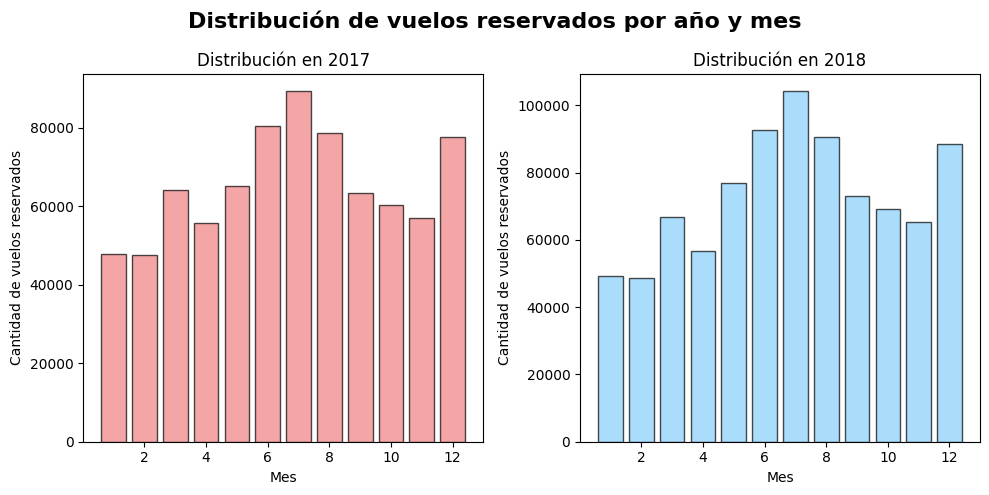

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Primera gráfica
axes[0].bar(df_2017['month'], df_2017['flights_booked'], edgecolor='black', alpha=0.7, color=colores_pop[0])
axes[0].set_title('Distribución en 2017')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad de vuelos reservados')

# Segunda gráfica
axes[1].bar(df_2018['month'], df_2018['flights_booked'], edgecolor='black', alpha=0.7, color=colores_pop[1])
axes[1].set_title('Distribución en 2018')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Cantidad de vuelos reservados')

fig.suptitle("Distribución de vuelos reservados por año y mes", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show();

Como no veo la distribución de forma muy clara, voy a proceder a realizarlo con **line plots** (o gráfico de líneas), ya que se va a entender mucho mejor y es el tipo de gráfico utilizado para ver valores cambiantes.

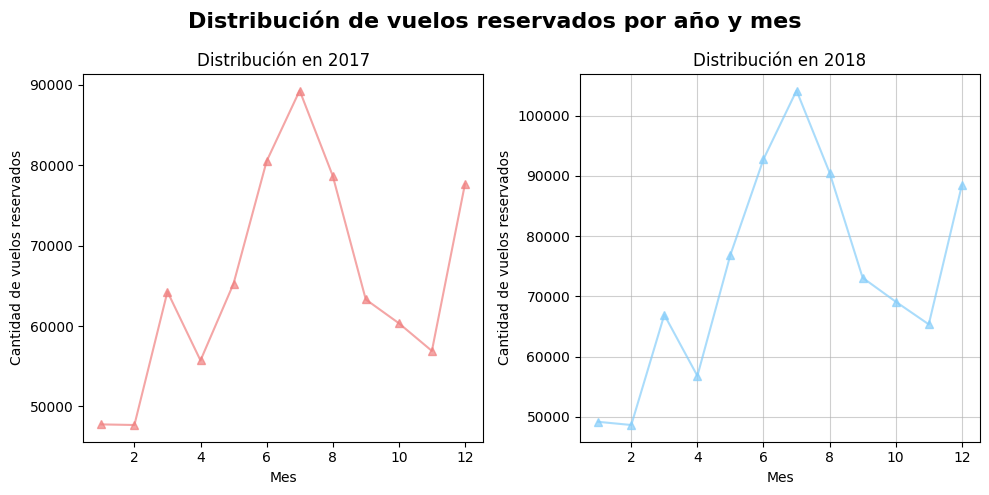

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Primera gráfica
axes[0].plot(df_2017['month'],df_2017['flights_booked'], marker='^', linestyle='-', alpha=0.7, color=colores_pop[0])
axes[0].set_title('Distribución en 2017')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad de vuelos reservados')

# Segunda gráfica
axes[1].plot(df_2018['month'],df_2018['flights_booked'], marker='^', linestyle='-',  alpha=0.7, color=colores_pop[1])
axes[1].set_title('Distribución en 2018')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Cantidad de vuelos reservados')

fig.suptitle("Distribución de vuelos reservados por año y mes", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show();

Si quiesieramos hacer uno que contenga todos los años, podríamos hacerlo igual, pero quitando la agrupación por año.

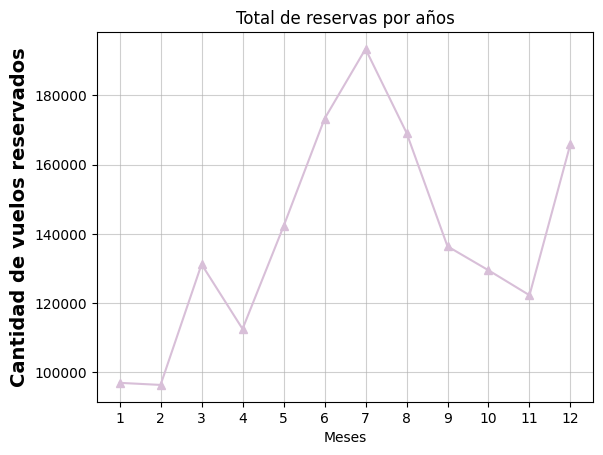

In [33]:
df_2017_2018 = df.groupby('month')['flights_booked'].sum()
plt.plot(df_2017_2018.index, df_2017_2018.values, color=colores_pop[8], marker="^")
plt.title('Total de reservas por años')
plt.xlabel('Meses')
plt.ylabel('Cantidad de vuelos reservados', fontsize=14, fontweight='bold')
plt.xticks(df_2017_2018.index)
plt.grid(True, linestyle='-', alpha=0.6)
plt.show();

Conclusión:

En ambos años observamos una distribución similar, con los meses de mayores ventas en Marzo, Mayo, Junio, Julio, Agosto y Diciembre. Esto tiene mucho sentido, ya que son los meses de mayor peso estacional, cuando más gente tiene vacaciones, hace mejor tiempo... Es decir, temporadas altas.

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Para determinar si existe relación entre varias variables, intuimos que lo mejor es usar un **mapa de calor**.

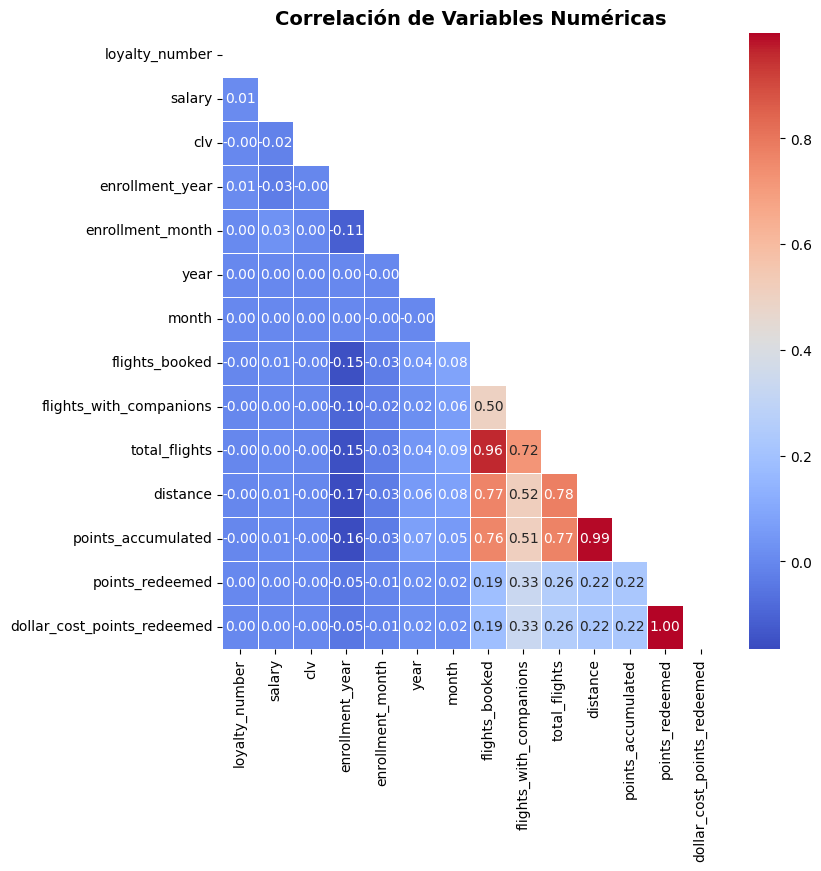

In [34]:
# Selección de columnas numéricas y creación de la correlación
df_corr = df.select_dtypes(include=['number']).corr()

# Máscara para ver únicamente la mitad del mapa
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Visualización con heatmap (mapa de calor)
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, mask=mask)
plt.title("Correlación de Variables Numéricas", fontsize=14, fontweight='bold')
plt.show();

Observamos que la variable `points accumulated` tiene una correlación positiva fuerte (*0.99*) con `distance`, por lo que hay una relación positiva muy clara.

De todas formas, vamos a comprobarlo de forma más visual con **scatterplot**, que me sirve para ver la relación entre dos variables.

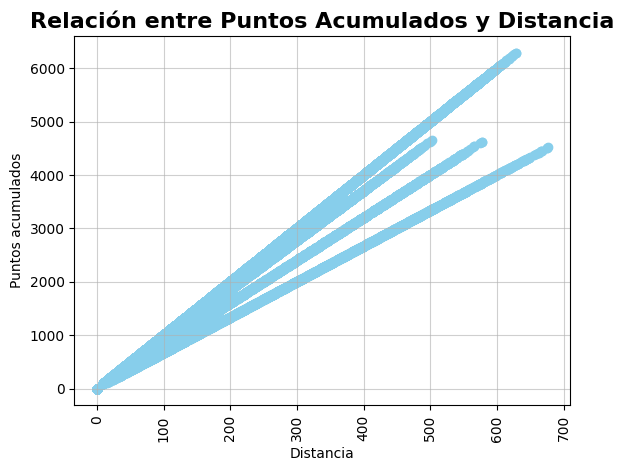

In [35]:
plt.scatter('points_accumulated', 'distance', data=df, color="skyblue")
plt.xticks(rotation=90)  # Gira los nombres para que se vean bien
plt.title("Relación entre Puntos Acumulados y Distancia", fontsize=16, fontweight='bold')
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.grid(True, linestyle='-', alpha=0.6)
plt.show();

Y ahora utilizaremos la librería seaborn y el tipo de gráfica **regplot**, que básicamente es un scatterplot pero con una línea de regresión.

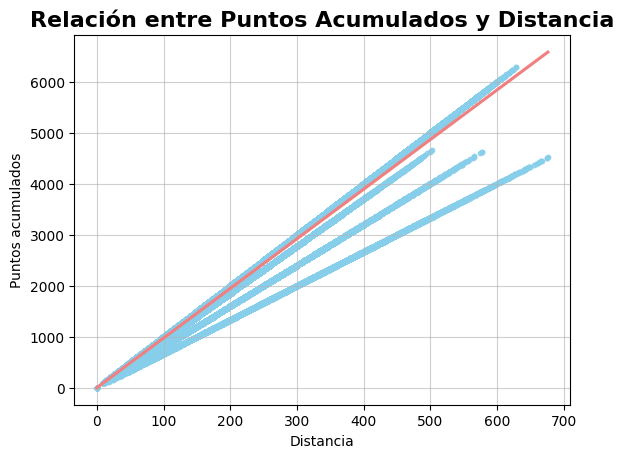

In [36]:
sns.regplot(data=df, x='points_accumulated', y='distance', scatter_kws={'s':10, 'color':'skyblue'}, line_kws={'color':'lightcoral'})
plt.title("Relación entre Puntos Acumulados y Distancia", fontsize=16, fontweight='bold')
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.grid(True, linestyle='-', alpha=0.6)
plt.show();

Por último, vamos a realizar un **scatterplot** con **hue** para ver esta misma distribución pero en función de la provincia.

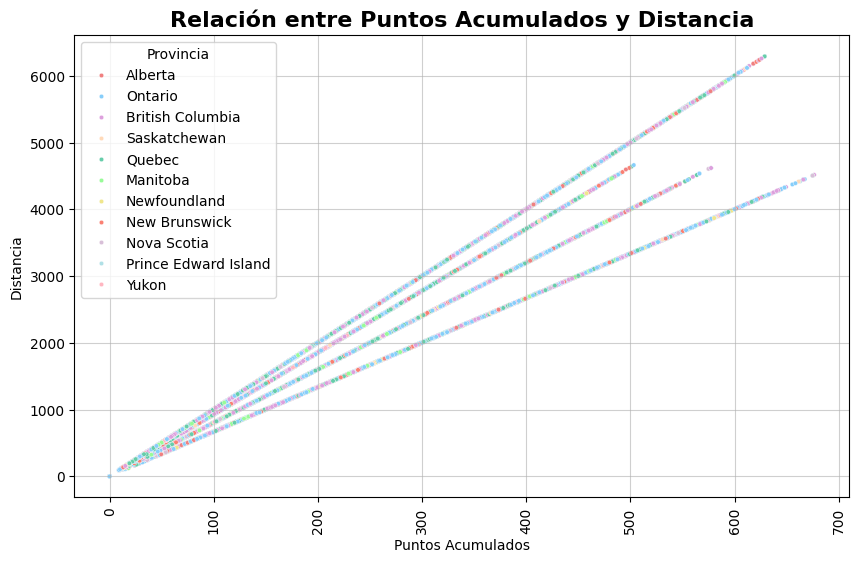

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='points_accumulated', y='distance', hue='province', palette=colores_pop, s=10)
plt.xticks(rotation=90)
plt.title("Relación entre Puntos Acumulados y Distancia", fontsize=16, fontweight='bold')
plt.xlabel("Puntos Acumulados")
plt.ylabel("Distancia")
plt.legend(title="Provincia")
plt.grid(True, linestyle='-', alpha=0.6)
plt.show();

Conclusión:

Vemos una relación muy clara y directa, que además tiene sentido: a mayor distancia recorrida, mayor es la acumulación de puntos para el cliente.

La distribución por colores es muy dispar, por lo que es dificil determinar preferencias.

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

Primero realizo una agrupación de la cantidad de clientes que hay por cada provincia.

In [38]:
df_province = df.groupby("province")['loyalty_number'].count().rename('total_clients').sort_values(ascending=False).reset_index()
df_province

,province,total_clients
0,Ontario,130258
1,British Columbia,106442
2,Quebec,79573
3,Alberta,23360
4,Manitoba,15900
5,New Brunswick,15352
6,Nova Scotia,12507
7,Saskatchewan,9861
8,Newfoundland,6244
9,Yukon,2679


In [39]:
df_city = df.groupby("city")['loyalty_number'].count().rename('total_clients').sort_values(ascending=False).reset_index()
df_city.head(5)

,city,total_clients
0,Toronto,80775
1,Vancouver,62314
2,Montreal,49687
3,Winnipeg,15900
4,Whistler,13994


Vamos a hacer una distribución en gráfico de barras ya que estamos usando columnas categóricas en las que queremos contar valores.

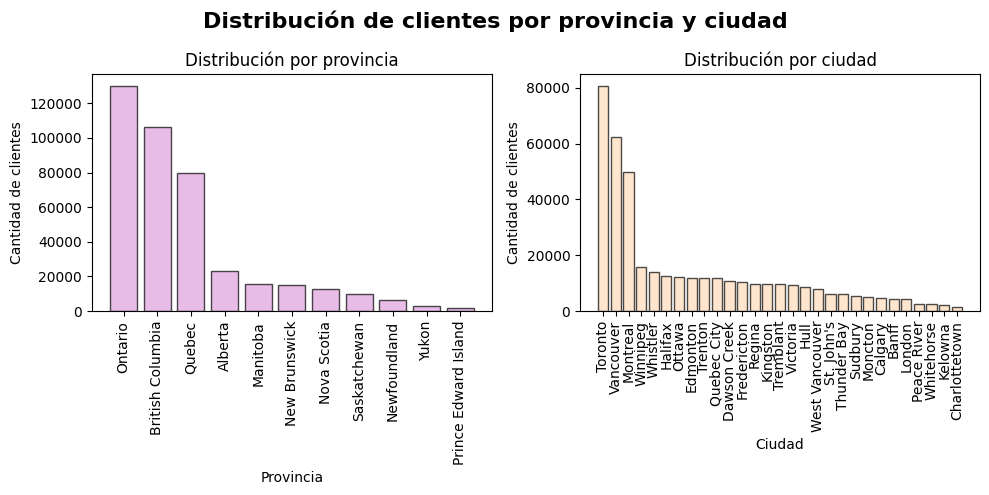

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Primer gráfico
axes[0].bar(df_province['province'], df_province['total_clients'], edgecolor='black', alpha=0.7, color=colores_pop[2])
axes[0].set_title('Distribución por provincia')
axes[0].set_xlabel('Provincia')
axes[0].set_ylabel('Cantidad de clientes')
axes[0].tick_params(axis='x', rotation=90)

# Segundo gráfico
axes[1].bar(df_city['city'], df_city['total_clients'], edgecolor='black', alpha=0.7, color=colores_pop[3])
axes[1].set_title('Distribución por ciudad')
axes[1].set_xlabel('Ciudad')
axes[1].set_ylabel('Cantidad de clientes')
axes[1].tick_params(axis='x', rotation=90)

fig.suptitle("Distribución de clientes por provincia y ciudad", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show();

Conclusión:

Tiene sentido que la provincia y ciudad en la que tenemos mayor número de clientes sean Ontario y Toronto respectivamente, ya que son las que mayor número de población tienen. 

Sin embargo, si nos fijamos solo en ciudades, vemos que Toronto va seguido de Vancouver y Montreal. En este caso el orden no corresponde las provincias con las ciudades, ya que Montreal (3er lugar en ciudades) se encuentra en British Columbia (2º lugar en provincias). Puede ser que provincias como British Columbia, comprenda de muchas ciudades con un alto número de clientes, por lo que la lectura va a variar mucho en función de si decidimos hacerla por provincias o por ciudades.

Si decidimos hacerla por ciudades, que entendemos que es más descriptiva, podemos ver que suele haber una relación directa entre ciudades con mayor número de población y mayor número de clientes.

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Haremos una agrupación según el nivel de educación, para así hacer la media en base al salario. Así, podremos utilizar esa variable para realizar un **barplot** (o gráfico de barras).

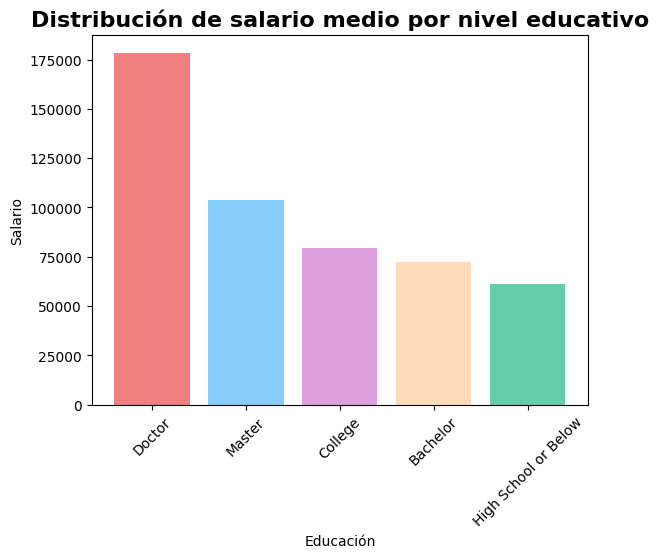

In [41]:
salary = df.groupby('education')['salary'].mean().sort_values(ascending=False)
plt.bar(x = salary.index, height = salary.values, color = colores_pop)
plt.xticks(rotation=45) 
plt.title("Distribución de salario medio por nivel educativo", fontsize=16, fontweight='bold')
plt.xlabel('Educación')
plt.ylabel('Salario')
plt.show();

Conclusión:

Hay una diferencia bastante notable entre la gente que obtiene un Doctorado, y el resto de niveles educativos.

Esta distribución y su escala tienen mucho sentido. La gente con mayor nivel de estudios, es la que obtiene un mejor salario y por tanto tiene un mayor nivel adquisitivo.

#### EXTRA: Distribución de salario según media, mediana y percentiles.

In [42]:
# Media y mediana
media_salary = df['salary'].mean()
print(f"La media de salario de los clientes es de: {int(media_salary)}$.")
mediana_salary = df['salary'].median()
print(f"La mediana de salario de los clientes es de: {int(mediana_salary)}$.")

# Percentiles
percentil_25 = df['salary'].quantile(0.25).round(2)  # Percentil 25 
percentil_50 = df['salary'].quantile(0.50).round(2)  # Percentil 50 (mediana)
percentil_75 = df['salary'].quantile(0.75).round(2)  # Percentil 75 
print("-"*100)
print(f"El percentil del 25% se encuentra en {percentil_25}$.")
print(f"El percentil del 50% se encuentra en {percentil_50}$.")
print(f"El percentil del 75% se encuentra en {percentil_75}$.")

La media de salario de los clientes es de: 79371$.
La mediana de salario de los clientes es de: 79371$.
----------------------------------------------------------------------------------------------------
El percentil del 25% se encuentra en 63901.0$.
El percentil del 50% se encuentra en 79371.73$.
El percentil del 75% se encuentra en 82940.0$.


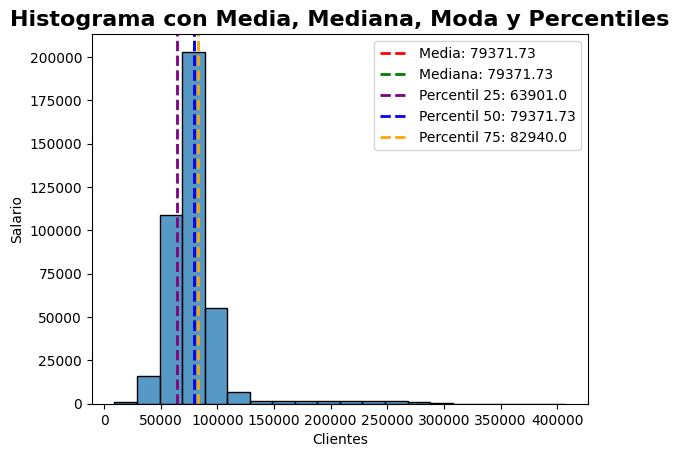

In [43]:
# Visualización 1: Histograma con Media, Mediana, Moda y Percentiles
sns.histplot(df['salary'], bins=20)

# Añadir líneas de la media, mediana y moda
plt.axvline(media_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_salary.round(2)}')
plt.axvline(mediana_salary, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_salary.round(2)}')

# Añadir líneas para los percentiles
plt.axvline(percentil_25, color='purple', linestyle='dashed', linewidth=2, label=f'Percentil 25: {percentil_25}')
plt.axvline(percentil_50, color='blue', linestyle='dashed', linewidth=2, label=f'Percentil 50: {percentil_50}')
plt.axvline(percentil_75, color='orange', linestyle='dashed', linewidth=2, label=f'Percentil 75: {percentil_75}')

# Configurar leyenda y título
plt.legend()
plt.title('Histograma con Media, Mediana, Moda y Percentiles', fontsize=16, fontweight='bold')
plt.xlabel('Clientes')
plt.ylabel('Salario')
plt.show;


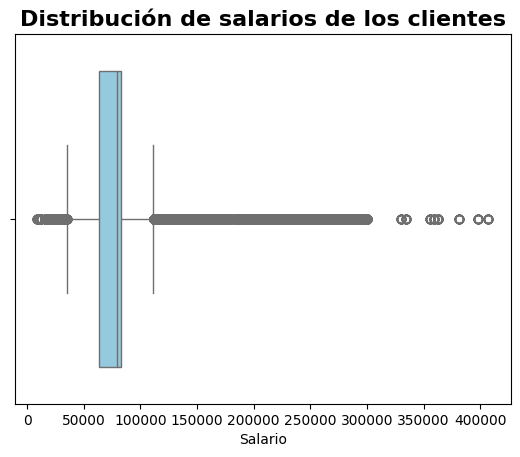

In [44]:
# Crear el boxplot
sns.boxplot(x=df['salary'], color="skyblue")

# Añadir título y etiquetas
plt.title("Distribución de salarios de los clientes", fontsize=16, fontweight='bold')
plt.xlabel("Salario")
plt.show()


### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

Como `loyalty_card` se trata de una columna categórica que solo contiene 3 tipos de tarjeta, la forma más clara y visual de ver las proporciones pensamos que es un **pie chart** (o gráfico de pastel, tarta o quesito).

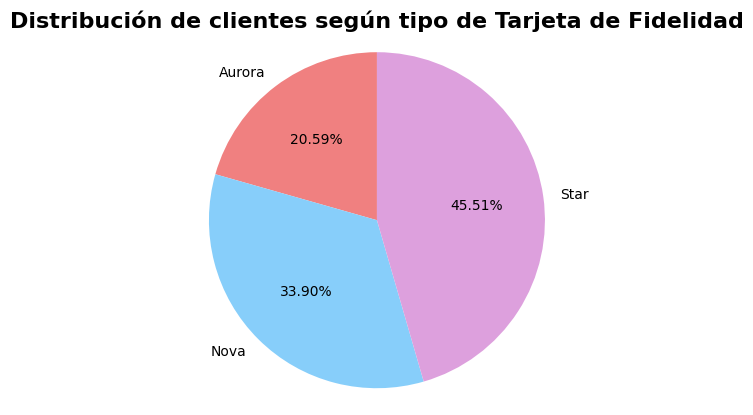

In [45]:
# Para contar valores y ordenar
counts = df['loyalty_card'].value_counts().sort_index()

# Gráfico de pastel con esos datos
plt.pie(counts.values, labels=counts.index, colors=colores_pop, autopct='%1.2f%%', startangle=90)
plt.title('Distribución de clientes según tipo de Tarjeta de Fidelidad', fontsize=16, fontweight='bold')
plt.axis('equal')  # Para que el círculo sea perfecto
plt.show();

Conclusión:

No sabemos muy bien qué incluye cada tarjeta de fidelidad, pero por cómo hemos podido ir viendo a lo largo del EDA y visualización, quizá la *"Star"* es la más frecuente porque es la estándar, la tarjeta *"Nova"* quizá equivale a un tipo plata, y la *"Aurora"* pertenece a una categoría tipo oro, y por tanto tiene acceso a ella un menor número de clientes. Quizá son los clientes que tienen un mayor número de puntos acumulados, que más vuelos han cogido, o que vuelos de mayor distancia han hecho.

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

Primero voy a cruzar tablas para hacerlo visual en un DataFrame haciendo una **tabla de contingencia**

In [46]:
tablas_cruzadas = pd.crosstab(df['marital_status'], df['gender']).sort_values(by="marital_status")
tablas_cruzadas

gender,Female,Male
marital_status,,
Divorced,30634,30128
Married,117363,117482
Single,54760,53393


Y ahora para traspasarlo a una gráfica más visual, vamos a realizar un **count plot** (o gráfico de barras) con **hue**.

Con el **countplot** lo que haré será en primera instancia crear una variable que cuente los valores de `marital_status` y añadirle con **hue** la leyenda en la que me lo distribuya también por `gender`.

In [47]:
# Variable para después dar orden según el estado civil
genero_estadocivil = df['marital_status'].value_counts().sort_values(ascending=False).index # añado el ascending=False para que salgan de mayor a menor

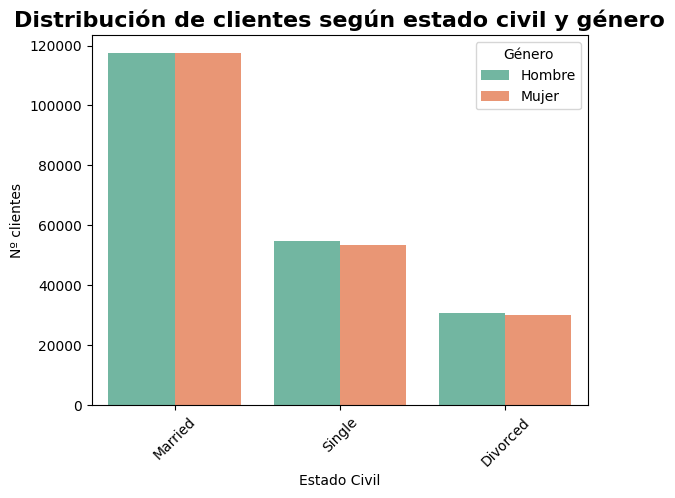

In [48]:
# Crear el gráfico de barras con los valores ordenados
sns.countplot(x='marital_status', data=df, palette='Set2', hue='gender', order=genero_estadocivil)

# Girar las etiquetas del eje X
plt.xticks(rotation=45)

# Cambiar los nombres de los ejes
plt.xlabel("Estado Civil")
plt.ylabel("Nº clientes")

# Cambiar las etiquetas de la leyenda
plt.legend(title='Género', labels=['Hombre', 'Mujer'])

# Título de la gráfica
plt.title("Distribución de clientes según estado civil y género", fontsize=16, fontweight='bold')

# Mostrar la gráfica
plt.show();

Conclusión:

No se observan grandes diferencias entre hombres y mujeres en la distribución de clientes.

Sin embargo, sí existe una diferencia notable según el estado civil: el número de clientes casados es aproximadamente el doble que el de los clientes solteros o divorciados.

Esto podría indicar que las personas casadas tienden a tener una mayor renta familiar, lo que podría explicar su mayor representación entre los clientes en comparación con individuos solteros o divorciados.